<a href="https://colab.research.google.com/github/Ionetxu/Datasciencecoursera/blob/master/Keras_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import math
import glob
import random

import gym
import numpy as np
from sklearn import metrics, manifold
from matplotlib import pyplot as plt

import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [21]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10500041498738426779, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9778129731736929098
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6255342225907180650
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276884378
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12373852167265610328
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import keras
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, Conv1D, MaxPool1D
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import sequence
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam

In [23]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

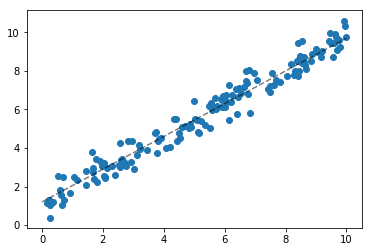

In [24]:
X = np.random.uniform(0, 10, size=(150, 1))
Y = X * .85 + 1.2 + np.random.randn(X.shape[0], X.shape[1]) * .5
plt.scatter(X, Y)
plt.plot([0, 10], [1.2, 10 * .85 + 1.2], 'k--', alpha=.5)

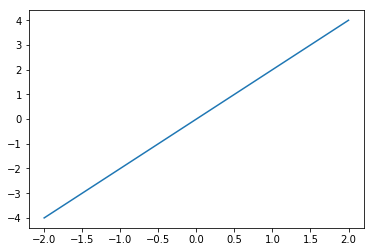

In [25]:
plt.plot(np.arange(-2, 2.1, 1e-1), np.arange(-2, 2.1, 1e-1) * 2)

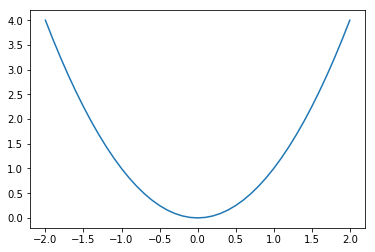

In [26]:
plt.plot(np.arange(-2, 2.1, 1e-1), np.arange(-2, 2.1, 1e-1) ** 2)

In [0]:
#inicializamos X e Y del grafo
X_ = tf.placeholder(tf.float32, shape=[None, 1], name='X_')
Y_ = tf.placeholder(tf.float32, shape=[None, 1], name='Y_')

#w = tf.Variable(np.random.randn(), name="weight")
w = tf.Variable(tf.constant(.4), name="weight", dtype=tf.float32)

#b = tf.Variable(np.random.randn(), name="bias")
b = tf.Variable(tf.constant(-2.), name="bias")

h = tf.add(tf.multiply(X_, w), b)

# RMSE
error = tf.reduce_mean(tf.pow(h - Y_, 2))

# Optimizer
#lr = .01
#optimizer = tf.train.GradientDescentOptimizer(lr).minimize(error)
lr = .005
optimizer = tf.train.AdamOptimizer(lr).minimize(error)

# Initializer
init = tf.global_variables_initializer()

In [28]:
training_epochs = 12
ws, bs = [], []

with tf.Session() as ss:
  ss.run(init)
  for epoch in range(training_epochs):
    indices = [x for x in range(X.size)]
    random.shuffle(indices)
    acc_error = 0.
    for i in indices:
      w_, b_, err, _ = ss.run([w, b, error, optimizer],
                              feed_dict={X_ : X[i].reshape(1, 1),
                                         Y_ : Y[i].reshape(1, 1)})
      acc_error += err
    ws.append(w_)
    bs.append(b_)
    acc_error /= len(indices)
    print('Epoch {}, error: {:.3f}, slope: {:.2f}, bias: {:.2f}'.format(
        epoch, acc_error, w_, b_))

Epoch 0, error: 16.511, slope: 0.89, bias: -1.40
Epoch 1, error: 2.874, slope: 1.12, bias: -1.05
Epoch 2, error: 1.270, slope: 1.16, bias: -0.88
Epoch 3, error: 1.084, slope: 1.16, bias: -0.73
Epoch 4, error: 0.981, slope: 1.14, bias: -0.60
Epoch 5, error: 0.872, slope: 1.11, bias: -0.46
Epoch 6, error: 0.763, slope: 1.08, bias: -0.32
Epoch 7, error: 0.670, slope: 1.07, bias: -0.18
Epoch 8, error: 0.591, slope: 1.05, bias: -0.04
Epoch 9, error: 0.512, slope: 1.02, bias: 0.07
Epoch 10, error: 0.456, slope: 1.00, bias: 0.20
Epoch 11, error: 0.405, slope: 0.99, bias: 0.33


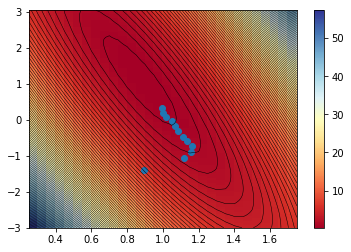

In [29]:
w_values, b_values = np.meshgrid(np.arange(.25, 1.76, .05), np.arange(-3, 3.1, .05))
error_values = np.zeros(w_values.shape)
for i in range(w_values.shape[0]):
  for j in range(w_values.shape[1]):
    error = 0
    for x, y in zip(X, Y):
      error += (y - (x * w_values[i, j] + b_values[i, j])) ** 2
    error_values[i, j] = error / X.shape[0]
plt.contour(w_values, b_values, error_values, 100, linewidths=0.5, colors='k')
plt.pcolormesh(w_values, b_values, error_values, cmap=plt.get_cmap('RdYlBu'))
plt.colorbar()

plt.scatter(ws, bs)

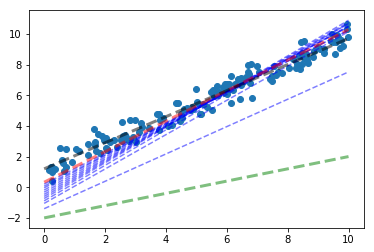

In [30]:
plt.scatter(X, Y)
for i in range(len(ws) -1):
  plt.plot([0, 10], [bs[i], 10 * ws[i] + bs[i]], 'b--',
           alpha=.5, label='learning')
plt.plot([0, 10], [b_, 10 * w_ + b_], 'r--', alpha=.5, lw=3, label='last epoch')
plt.plot([0, 10], [1.2, 10 * .85 + 1.2], 'k--', alpha=.5, lw=3, label='true')
plt.plot([0, 10], [-2., 10 * .4 - 2.], 'g--', alpha=.5, lw=3, label='initial')
#plt.legend()

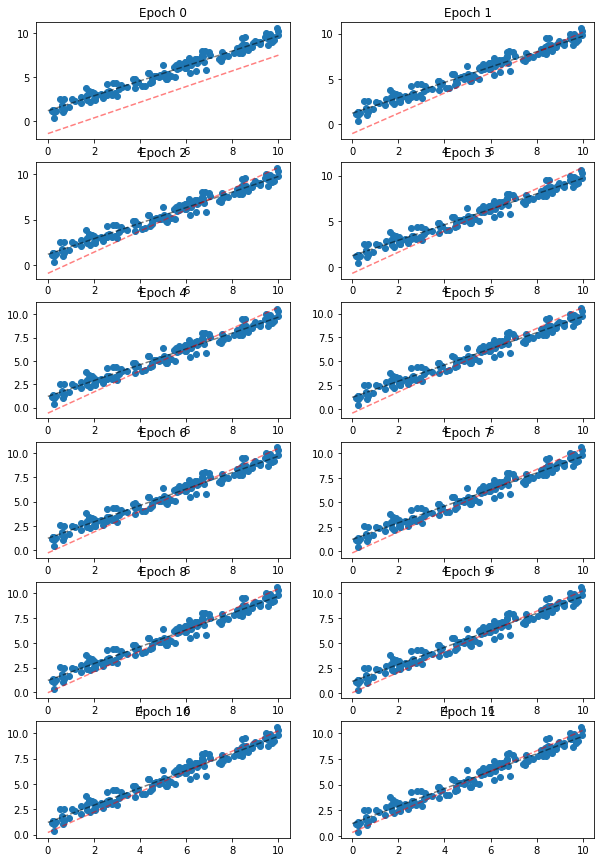

In [31]:
fig, axs = plt.subplots(int(training_epochs / 2), 2, figsize=(10, 15))
for i, ax in enumerate(axs.reshape(-1)):
  ax.set_title('Epoch {}'.format(i))
  ax.scatter(X, Y)
  ax.plot([0, 10], [1.2, 10 * .85 + 1.2], 'k--', alpha=.5, label='true')
  ax.plot([0, 10], [bs[i], 10 * ws[i] + bs[i]], 'r--', alpha=.5,
          label='learned @ {}'.format(i))

In [32]:
#solo tine 1 input o una x, y dense=1 es que tiene 1 neurona. Use_bias= es la b, y es TRUE por default
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD(lr=0.001, momentum=0.0)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(X, Y, batch_size=1, epochs=50, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
150/150 [==============================] - 1s 8ms/step - loss: 3.0413 - mean_squared_error: 3.0413
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4103 - mean_squared_error: 0.4103
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3869 - mean_squared_error: 0.3869
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.3675 - mean_squared_error: 0.3675
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3591 - mean_squared_error: 0.3591
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3437 - mean_squared_error: 0.3437
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3258 - mean_squared_error: 0.3258
Epoch 8/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3198 - mean_squared_error: 0.3198
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss

In [33]:
model.get_weights()

[array([[0.8990258]], dtype=float32), array([1.0747669], dtype=float32)]

In [0]:
def xentropy(true, pred):
  return -(true * np.log(pred) + (1 - true) * np.log(1 - pred))

In [0]:
y_true, y_pred = np.meshgrid(np.arange(0.1, 1., .01), np.arange(0.1, 1., .01))
error = np.zeros(y_true.shape)

for i in range(y_true.shape[0]):
  for j in range(y_true.shape[1]):
    error[i, j] = xentropy(y_true[i, j], y_pred[i, j])

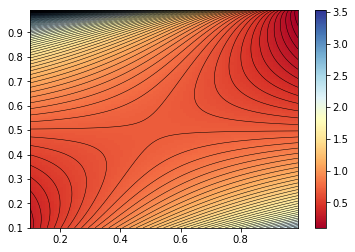

In [36]:
plt.contour(y_true, y_pred, error, 100, linewidths=0.5, colors='k')
plt.pcolormesh(y_true, y_pred, error, cmap=plt.get_cmap('RdYlBu'))
plt.colorbar()

In [0]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

In [38]:
softmax(np.array([3., 1., .5]))

array([0.82140902, 0.11116562, 0.06742536])

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# 784 neuronas
input_dim = 784 #28*28 
#normalizo los valores
X_train = X_train.reshape(60000, input_dim).astype('float32') / 255
X_test = X_test.reshape(10000, input_dim).astype('float32') / 255

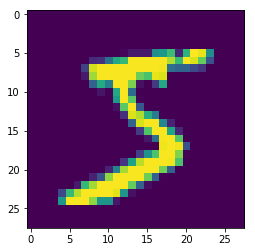

In [41]:
plt.imshow(X_train[0].reshape(28, 28))

In [42]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

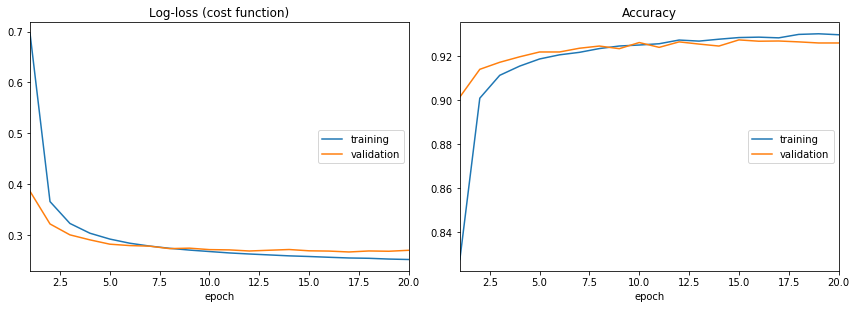

Log-loss (cost function):
training   (min:    0.252, max:    0.696, cur:    0.252)
validation (min:    0.267, max:    0.386, cur:    0.270)

Accuracy:
training   (min:    0.827, max:    0.930, cur:    0.930)
validation (min:    0.901, max:    0.927, cur:    0.926)
Train score: 0.2506160741964976
Train accuracy: 0.9319833333333334
Test score: 0.270203315487504
Test accuracy: 0.9261


In [44]:
inputs = Input(shape=(784,))
preds = Dense(10, activation='softmax', use_bias=False)(inputs)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.5)
sgd = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
#batch_size = cuantas records le paso a la vez - es mas eficiente si le meto mas datos a la vez, los gradientes son mas estables, entonces el learning rate puede ser mas alto

history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0,
                    validation_data=(X_test, Y_test),
                    callbacks=[PlotLossesKeras()]) 
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Test score:', score_test[0])
print('Test accuracy:', score_test[1])

In [0]:
#Deberia hacer un early stopping en epoch ~ 8 porque empieza a hacer overfitting, training sigue mejorando pero validation ya se satura

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7840      
Total params: 7,840
Trainable params: 7,840
Non-trainable params: 0
_________________________________________________________________


In [0]:
#None = batch size
#Cuanto menos parametros mejor


In [47]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [48]:
model.get_weights()[0].shape

(784, 10)

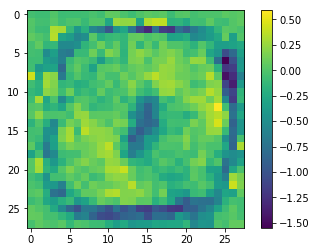

In [49]:
plt.imshow(model.get_weights()[0][:,0].reshape(28, 28))
plt.colorbar()

In [0]:
#Los pesos dibujados - no es un cero, dibujan el contorno del cero. Penaliza mucho si en medio, o el contorno. 

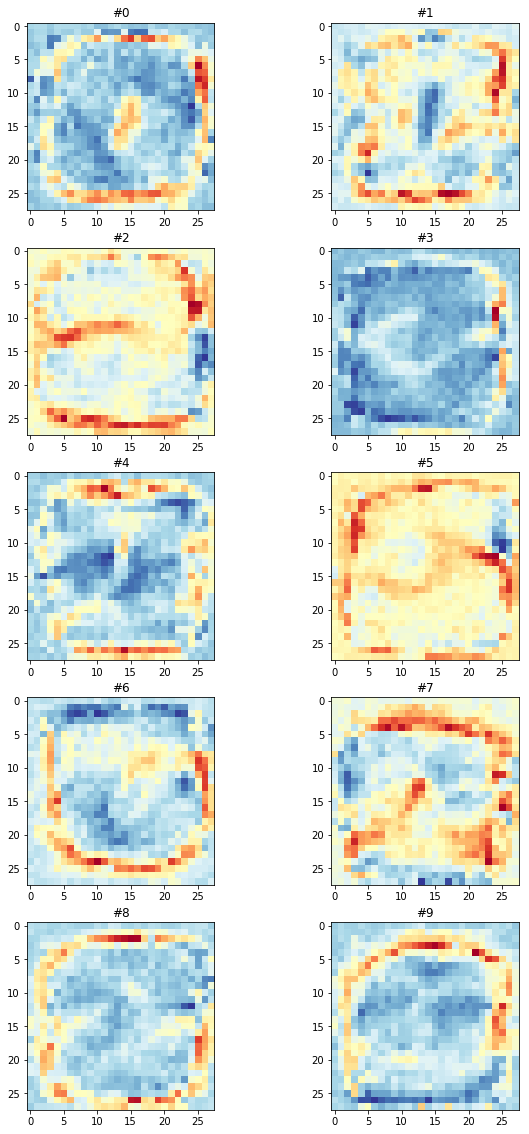

In [51]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
for i, ax in enumerate(axs.reshape(10, 1).squeeze()):
  ax.imshow(model.get_weights()[0][:,i].reshape(28, 28), cmap='RdYlBu')
  ax.set_title('#{}'.format(i))

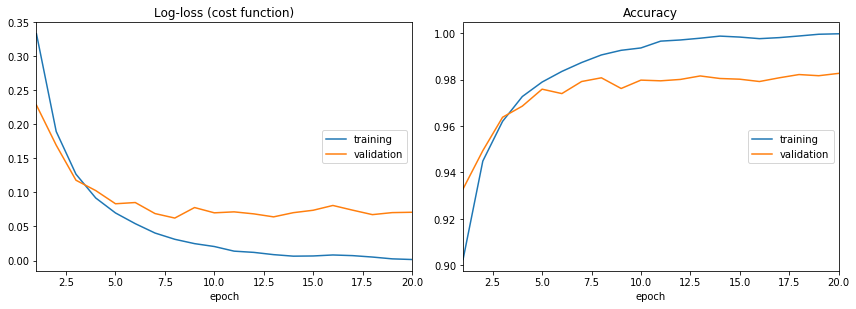

Log-loss (cost function):
training   (min:    0.001, max:    0.333, cur:    0.001)
validation (min:    0.062, max:    0.228, cur:    0.071)

Accuracy:
training   (min:    0.902, max:    1.000, cur:    1.000)
validation (min:    0.933, max:    0.983, cur:    0.983)
Train score: 0.0018497581670642224
Train accuracy: 0.9996833333333334
Test score: 0.0708802293959774
Test accuracy: 0.9827


In [52]:
inputs = Input(shape=(784,))
h0 = Dense(1024, activation='tanh', use_bias=False)(inputs)
preds = Dense(10, activation='softmax', use_bias=False)(h0)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.5)
sgd = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0,
                    validation_data=(X_test, Y_test),
                    callbacks=[PlotLossesKeras()]) 
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Test score:', score_test[0])
print('Test accuracy:', score_test[1])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              802816    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10240     
Total params: 813,056
Trainable params: 813,056
Non-trainable params: 0
_________________________________________________________________


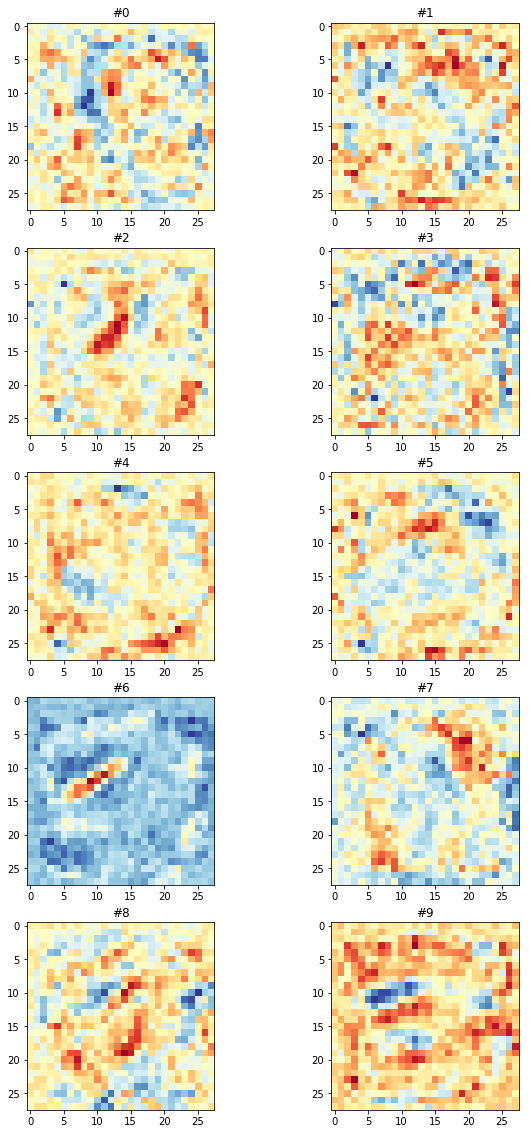

In [58]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
for i, ax in enumerate(axs.reshape(10, 1).squeeze()):
  ax.imshow(model.get_weights()[0][:,i].reshape(28, 28), cmap='RdYlBu')
  ax.set_title('#{}'.format(i))

In [0]:
#salida del hidden node, no es tan facil de interpretar
# aplico un dropout para borrar neuronas al azar en hidden layer

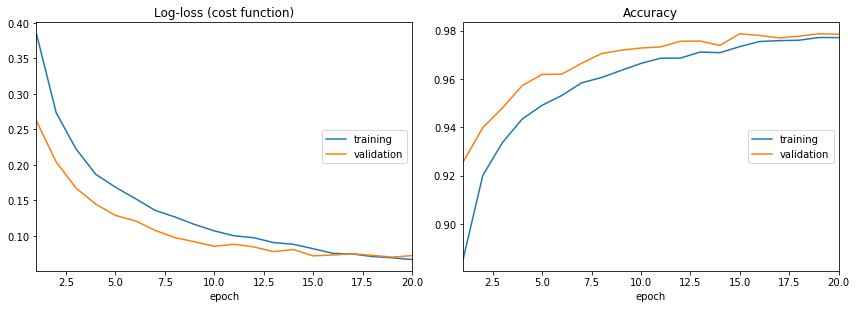

Log-loss (cost function):
training   (min:    0.067, max:    0.385, cur:    0.067)
validation (min:    0.070, max:    0.262, cur:    0.072)

Accuracy:
training   (min:    0.885, max:    0.977, cur:    0.977)
validation (min:    0.926, max:    0.979, cur:    0.979)
Train score: 0.02496718978127853
Train accuracy: 0.9927
Test score: 0.07225717733669444
Test accuracy: 0.9785


In [63]:
inputs = Input(shape=(784,))
h0 = Dense(512, activation='tanh', use_bias=False)(inputs)
h0_drop = keras.layers.Dropout(.5)(h0)
preds = Dense(10, activation='softmax', use_bias=False)(h0_drop)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.5)
sgd = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0,
                    validation_data=(X_test, Y_test),
                    callbacks=[PlotLossesKeras()]) 
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Test score:', score_test[0])
print('Test accuracy:', score_test[1])

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              802816    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10240     
Total params: 813,056
Trainable params: 813,056
Non-trainable params: 0
_________________________________________________________________


In [61]:
print(model.predict(X_test).shape)
np.argmax(model.predict(X_test), axis=1)

(10000, 10)


array([7, 2, 1, ..., 4, 5, 6])

In [62]:
metrics.confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1))

array([[ 970,    0,    2,    2,    0,    1,    2,    1,    2,    0],
       [   0, 1126,    2,    2,    0,    1,    1,    2,    1,    0],
       [   1,    0, 1020,    3,    1,    0,    1,    5,    1,    0],
       [   0,    0,    3,  998,    0,    2,    0,    5,    2,    0],
       [   0,    0,    3,    1,  971,    0,    3,    0,    0,    4],
       [   2,    0,    0,   11,    1,  873,    3,    1,    1,    0],
       [   6,    3,    3,    1,    2,    3,  940,    0,    0,    0],
       [   1,    5,    9,    0,    2,    0,    0, 1005,    1,    5],
       [   3,    0,    4,    7,    8,    3,    3,    6,  938,    2],
       [   4,    3,    0,   11,   13,    2,    0,   10,    0,  966]])

In [0]:
#Confunde los 7 con los 2 y los 8 con los 3

Redes convolucionales

https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [65]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Input es de 28x28 y un canal, y aplico 32 filtros convolucionales de 8x8 
Strides = cuantos pixels desplazo mi filtro.
Luego voy a aplicar un pooling, que es de una region sacar el maximo. 
En la convolucion 2, aplico 64 filtros pero con kernel size 2 x2 ( divide la imagen)
Flatten --> ponme las imagenes en una columna, y aplico capa densa con activacion softmax ( regresion logistica)


In [66]:
inputs = Input(shape=(28, 28, 1))
c0 = Conv2D(32, kernel_size=8, strides=2, activation='relu')(inputs)
p0 = MaxPool2D(pool_size=(2, 2))(c0)
c1 = Conv2D(64, kernel_size=2, strides=2, activation='relu')(p0)
p1 = MaxPool2D(pool_size=(2, 2))(c1)
#p1_drop = Dropout(0.25)(p1)
f0 = Flatten()(p1)
d0 = Dense(128, activation='relu')(f0)
d0_drop = Dropout(0.5)(d0)
preds = Dense(10, activation='softmax')(d0_drop)
model = Model(inputs=inputs, outputs=preds)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
__________

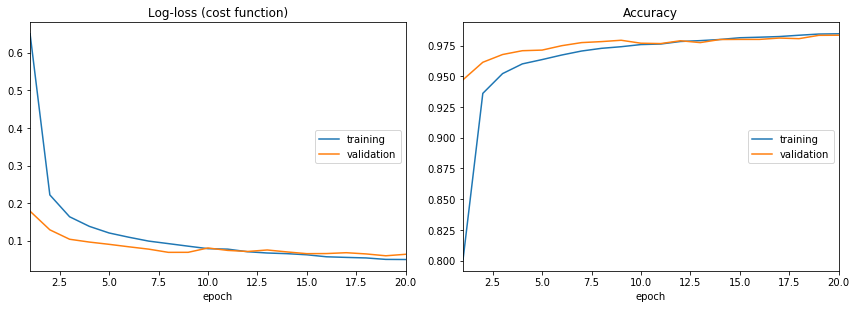

Log-loss (cost function):
training   (min:    0.050, max:    0.651, cur:    0.050)
validation (min:    0.060, max:    0.178, cur:    0.064)

Accuracy:
training   (min:    0.801, max:    0.985, cur:    0.985)
validation (min:    0.947, max:    0.983, cur:    0.983)
Train score: 0.02422531675941427
Train accuracy: 0.99265
Test score: 0.06375682937944258
Test accuracy: 0.9834


In [67]:
sgd = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0,
                    validation_data=(X_test, Y_test),
                    callbacks=[PlotLossesKeras()]) 
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Test score:', score_test[0])
print('Test accuracy:', score_test[1])

In [68]:
[x.shape for x in model.get_weights()]

[(8, 8, 1, 32),
 (32,),
 (2, 2, 32, 64),
 (64,),
 (64, 128),
 (128,),
 (128, 10),
 (10,)]

In [69]:
model.get_weights()[0].shape

(8, 8, 1, 32)

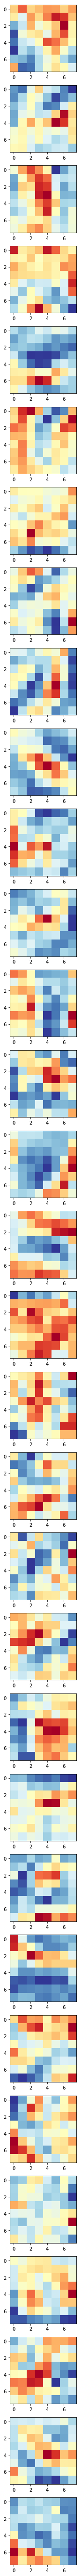

In [72]:
fig, axis = plt.subplots(32, 1, figsize=(10, 100))
for i, ax in zip(range(32), axis):
  f = model.get_weights()[0][:,:,0,i]
  ax.imshow(f, cmap='RdYlBu')

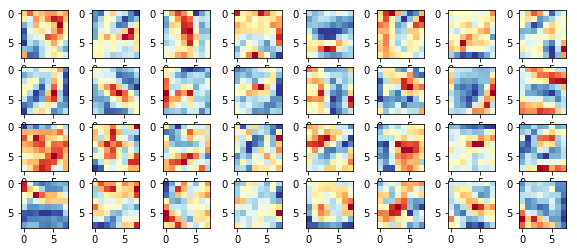

In [73]:
filters = model.get_weights()[0]
fig, axs = plt.subplots(4, int(filters.shape[3] / 4), figsize=(10, 4))
for i, ax in zip(range(filters.shape[3]), axs.reshape(-1)):
  ax.imshow(filters[:,:,0,i], cmap='RdYlBu')
  ax.grid(False)

VGG  - quitamos la ultima capa para quedarnos con la representacion 

In [74]:
model = VGG16()
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)

553467904/553467096 [==============================] - 39s 0us/step


In [90]:
!wget -q -O boat1.jpg http://gondan.com/wp-content/uploads/2013/10/sea-cloud-II.jpg
!wget -q -O boat2.jpg https://cdn.cnn.com/cnnnext/dam/assets/121008114222-tres-hombres-2-horizontal-large-gallery.jpg
!wget -q -O boat3.jpg https://okdiario.com/img/2018/08/17/barcos-655x368.jpg 
!wget -q -O boat4.jpg https://trabajarporelmundo.org/wp-content/uploads/2016/06/trabajar-en-crucero-de-MSC.jpg
!wget -q -O boat5.jpg https://www.astillerosamado.com/images/barcos/barco-pesca-20m.jpg 
!wget -q -O boat6.jpg https://fotos00.lne.es/2018/03/21/328x206/barco-escuela-atyla.jpg
#!wget -q -O boat7.jpg https://newimages.yachtworld.com/resize/1/upload/WCoastOffshoreWest04-08.jpg?w=2048&h=940
!wget -q -O boat8.jpg https://www.lavanguardia.com/r/GODO/LV/p5/WebSite/2018/09/23/Recortada/20180325-636575858917791066_20180325144813-162-kTsH-U4519901328671XD-992x558@LaVanguardia-Web.jpg
!wget -q -O jira0.jpg https://cumbrepuebloscop20.org/wp-content/uploads/2018/09/jirafa.jpg
!wget -q -O jira1.jpg data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSEhIVFRUVFRUVFRUVFRYWFRYVFRUWFhUVFRUYHSggGBolHRUVITIhJikrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGi0lICUtLS8tLS0tLS0tLS0tLS0tLS0vLS0tLS0tLS0vLS0tLi0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAUGAAECBwj/xAA9EAACAQIEBAQEBAUCBQUAAAABAhEAAwQSITEFBkFREyJhcTJCgZEHUqGxFCNywfCC0SQzU2KiFSVzkrL/xAAZAQACAwEAAAAAAAAAAAAAAAABAgADBAX/xAAsEQACAgICAAUDBAIDAAAAAAAAAQIRAxIhMQQiQVFhEzJxgZHR8bHwBSOh/9oADAMBAAIRAxEAPwCbVaIq1oURa1qzM6NhaIqVpRRkFPyDgxVoyitKKMq0CGlWiBa6VaIEoMIMLXYWiKtdhKBAYSjYYax3rapXV20QrR8WUx7xpQYUV+9zhYFxkAnKzKTIGq7x/nUd6sOEuh1DDY99x6H1ryThg+NLircBJJVh5wwPnhtwYJ+/pr6XynbUWyqksNIJ66QTH2rDDxO09aN+Tw2sNkyZVa5vuqKzsYVQWJ6AASTR1qH5yE4HE/8AxMftBir2Zoq2VuzzZdv3ptCLG6mNWURJ+/T6e9twlzxEDRrJBA7gx/nvXj3D+IFVAn4AQI00zZgunTTv81ercsYo3bZY9ln3gz+wrLizylPVmzP4eMYbIca0KG1qnWShsK1mGhIpWslMslclaJBfJWslHy1opSjISvW6Dkp+4tBNurIvgql2KslCy06UrhrdMgMUy0NxTjW+tBuLTJAb4E3oLJTbW6G6VakVt32KZayKMVrV23TP2F5fJgrK4JrdJoxrO1FFRa2qUZEoJjNGItHRK2iUxbSoSjlEoq267RKOqUAg1Skr3FLaXDaIYkAFmABUSJAOs7QdutSoWqiEZr9xh1vXAe8Kco19lFZ8+RwjaLsMFN8lqtEMAykEHqKKFquK1y202j/UrCVPuP71YOF49LpiMrjdDv7qfmFV4vFRnw+x8vhnDldBgtd5KaC+ldBNZq7Yq1PGOPWPCxl+3l0zltTAhtdD00JGvQ1eORywZl+UoCDt5p1gdBA/Sq7z8VXHEkB9UXLB18iaaa96nOBEW2OQZSNQpcwNJIk9PMJ99K5Enplv2Z2YrfFXui6RUFzzf8Ph+JY/9PL7l2CR/wCVT2Huq4DKZB+49D2Nee/ijxlXKYG2wkN4l7SfhXyWgO5LBj2gd9OhOaULOdig3NIonCsErtBbYAlT08wM9zB7+or2XlW1Fj3I6R8o6dO30rzDhlrw7i3PD+IAEjWJ3lTqADvH6V6lyo7G0VdcrLECI8usGPt+lYcD/wCxG/xCf02SRFBuU6yVH8UxSWlz3DAH1JPQKOprpWlyzltN9HEVDcQ48iEi2viEbkGF+hgyf0qOx2Ou3x/07X5AdW/rbr7be9KgeUQPT9R1+hrDl8bbqH7mzH4Slcy14S+LiLcXZgDB3HcH1BkUfJUfywv/AA49HuD/AMif71K5a3Qe0UzHJayaAMlCKU4Urk26ZCsTNutG1TeSt+HTWCrETYoZs1Im3Q2t0LZKRGvh+tKXrJqYZKVurTRm0CUEyMWzG9DxKmnrooLkU27uxdOKI+K1R8tZVn1CvRhkFMItCtimrQoDBLaUxbStW1pm2tBsJiJRlSsUUQCkbDRoLVcw9qLl1ToRdcz0hnzD9D+tWcCq/wAYtm3ezDa4AddsyeU/pk/WqM6tF+F0yA54N+0nj2D5gIYbjYCarnKvNd2/dTMkMrAs35e8H20j1qx84cSuYe0bqLnQ6lD22I1qncr8Ts3bhZWS3mPwZQxB6gE6R/vXO1pttHQ2tVZ7Vy9xQYi2SRDoQr+sqCGHoZ+4NScx7daovAL5s3ww1S4cpgaaf5NXbiCRauEEfA8H1ymK248ilGzHkg4yo8nxPEP+Na86oxIa4VuRlWWCoTPYADprtVis4hLgm2VZnBM6qFUyAAQDlYa/aqjdwavcvK9xUBcZp1bwrflgdgWDGrPYvKAuRCYhRJMR83fQAduvvXOycs6ePhA8WbyoDaxLC6vl8SQq3FHyN3MEHN32jWqdgWe07MzKWZ805lYHNOaXBMEyDv8AWrjxK9b8qO6qTJRSkMQsHSfiA3zba0DFcGtshY5GJAjISdAdpgdT9j9akX5dWRp3aEzjEMADLpCvuQCY8pO5mNfaKuPKPEzeFstPiKDbuDvtBPqDVYxuBFy3rKEEDK6ZQRJGTMmk9mHepvgapbC3LbFm8pn5WAIzSPzQG0jftUi9XYJLaNF0usFBJMAAknsBua8l5w4tfdTetp4nm8qDdUAMEA7mDrGtei8w4vMDbSPlzHpvIX+9eRc5Y60pyw7ZYEJcCroBqRmE/rWjNl2loujNhxax3fYhyzxDF4u7DFltj4pH++s+lX5IWATpso6d9e9Ufkrid3ENktoEtqIkA5iRoczHrV8xIGiIJbRV7lzAAHuao083VF23Hdli5Zt/8ODEZnuMPbMVH/5qUK1rC4YW7aWwfgVVnvA1P1Ov1ouWunBaxSOZJ3JsCRXOWj5a1lpxKA5azJRstaioGgBSuGWmCKGwogYo6UpeWpBxSl0UUwMj7i0pdFPXaUvCaexWhasrqKylHGbYpq3S1umrdWlIzbFMoKBaFMrQYTtRRVrhRRBSDGxS3EsF4tsroGBzIT0Yd/Q6g+9NCt0r5GTopOKs50NphDAwwbWDEQR2/TavK8Zw65hr5S5YyLmlWtAm0xMbzOQ6baV9AY/h1u98Uq0QHXceh6MPQ1CYrg15NSq3IkZlEyvZkPQ9tR61lnjNMMhUOF8UlFyjNA+AHXOsOjT0jzDpuPSrJ/HXsTbe6TksoCvnOW2X3YZjuCYXTYZhUTwjgA8YLORRLuB5Whug9SdNdhO+gqR5psBViyJQCBaLOIE6gIWBC/8Ack6ToeubTRM0KSk0VXi2Eayi3ZtuhUm4PEHnBDSSZnd3PXepThuKS2otKUSUDZUuEsMxkL5t50GusExrURbup8JXxEtoym3cTNdaQYCXjpcA1BO/Q1H2MttQ+U522DwCE11YDSRpp0ikaL4uzOYMaWurA0AggTqoMxHQHTT1qT4XxjMuqyI1OkwdNzvEfWuOH8FfEobgQDSQSTuNSfUbj6UzwvCqoIKjqNjmGu0dDNB8F0WnwWXAYtHKo8OPKZA0Om57/wCdKNhrxW+EKqFZxog8yXfiViw0IaBr1kzqKHhMMCFIYC7aMMPhzKSQNZ+lEwGMyu7SFGTP5RmMBsro20rmg7z2oOhGmD5uW8qeKoldPGtqQz2yZlgF1KsB7iT0mPH8eXxNwmzbvXifMCNbUSfjMwonvA9a9uuXiiuFV0A8pEkHUqFIAExpIAJIB1IpX/0s3irYMKA2Y3VLAKbix5zl3OusTtO5NWY4c36lE58EVydw58Jh/wCcbQO5W0uW2v8AqiWJnf8AferNy/gCz/xLgwP+SCIJEEeIR0EEge89qd4ZyyiQ94i641AiLS9oTqfU/YVNOK148aTtmTJltUjgGa6FcgVuryg2RXJWt1gqEMy1yRRK0aBADCuGFGYUNqJBd6VvU24pS5RIxG6KTuin7opS6KNiihWsroit0QcBbdNWzSlumrZq4rHLdMpStqmUpWEMKIKGtEFIMdCt1qt0AmV0GNaFbFAYieJYUi4LomIIiYAYwTPvA/WqNxDj2Js3rgW0GtswLZVDgg999JnerlzdwC9jbLW0xBtKAWVLY8zuAYDuTtrsANdydq8Ht4e9g3FwXSXNuXJYr5dSV0EmCNZ+1Z8mNGjDJnofGMRbuoHAyllltzLCJDA69ZDTIiNqqd/AXHxADEwy5gSZ0BBj6DT61cOEZr+Ft3bqCCxh4ylgpIBYDr9gYmmrtm2iqzHVjlEdydN/82rI48mpSVFa5b446XCh8qW2yeGBpBby6k77D1g16Ituw5F2AWIykREn8321+teecYtKuJSJOfVoESACANOus1aOE4ggwwABUArA0XWY1kR7aT6Gq5cFy5XBJ8w3LS4ZmUHOfIJ3n36aLPuPWqnglvYdwLgGUZmzAEETDA5TuB/arhbyu1rMA1stkIOskqwifYnT1p7jXDLd1YBMgBZGuhI0jY6T7aUILYk5aqik8W4veZMlgZgxIjq2ugYn9ehNTn4XvdaWZ7LCHORHll1UagaHQbiqr+Itm5aFq1nyLdzDsIEGGjX29z3qx/h7yHaSzbxL+NZvZnKFLjKckwrZT0YAeUypABjWtmKNdmPK/LwekTXLitges+umvvFbrQZgUVyWohoY3phTdZWutbBqEMWt1ytbqERwRQ3NEagvUCCelLtM3DSl00ULYtdpW7TNyl23okYvWV0RWUQcexq3TVul1QjpR7dXWVUOWjTNulrQOmm9OWrR9qRtBSOwaIKIlla29iNRrSbIs1ZzW65FdxUIjAa3Nc1ugE7RoNeRc38hXXxrGyR4V9s7Zmb+VmYeJkTaSZP12NetVAc1XmU2iJ0lmA3ygqoI9QXB/wBJqvJxGx8d7Uau5MPZ8K0oy2rYAUdFURVU4xct38gt6MYkAg5FMgsdegqzXrRcdfOD943+1Q+H4QMOly6wzNlciSPlmBr/AJpWGd38G3HrXyVvjFgm3n3e04z6RquhI+h29KZ4VxJltguWuZddADG0rPaCDUZgrrXr91WYgXkZRp83xKfsWpjhVxA0KpKrA9S2zE+k5fvVEnZpSrgu/C8SLpUgxmMxoYZNST1G23qKlcLjMvi6/E8j01EjvuCf9VV/gfhOVAUgsdSd5YFDPrr+1S2CwAkMxgqQGGsllYET9EO3UGhjbvgmVKuehHn3gxxC4e4pUFXRvMFYZWBVhBEMfMGA7qO1XjCplRABEKoj2AFRfGvKiMihvDYNlMakKwEyO7AT0LUfgXGFxVvxApXuDGh2I9NQa3xyLbR9mCWJuG66JGuTWzXNXooNVywrqsIoimhWyK5mtzRIZWVhrkmgQ09L3KMxoNyiEBcpW6aYumlbtFCgHpdxR7lBcUSNXyANbrorWUeBN2HFM2zOhFLIaYtUpYh23FMqaUQ0e2aFEsYU0RWoQNESoFnN5Oo+tcUwRpFdC0BR2BqKxW6YuW52oBEaGonYGqNVUua77rjLAUamxfCHpnIJEjqJVR9at01D81XxZs/xPh+I1qRG3lciZPQSBVWf7GW4H50QPD+JG74jSAPDS4i9QGRS2vXVjrXBunE2ri/C0xDGdJ29iBv61UreJ8JptHMLf8y1O7Wb2jWnHdXOWP8AvY1a+GWWF0kDLb8JSpgQQR5Ne4EA+oNc+M3Lhm+UFHlEEvCvAxCXHYCWPhruSTmAn0yk1G37TJioWcpZpOoXLBJk9NQNelSvGMK38SiTMIuRm2Gjak9Inf0FExHBsQMguWxctxPiqykZvlmDoNTVbVFt3yTHLtkEhlkEOhgde/uYJ1qx2QLgFxWIIZg46k+ZVb1GpPvNVngF1LQzLl2gAGJZQR120/brVowGHnMdQLvxI0SnwiVjp5Z/1UMH3EzfaR963ddot+dCnguw8xFwBCn+nyKPedq75PvItxyTlNz4lny5x80bCRGumo9ageXedks4hcO6HKTlzg6FiRmZvXMxpnjmaxfuHLMOWKicrI+uZRsdDBHUilyT0kssX+SzHDeLxSX4f+/oeh3EodVDB8ZfDBHLBsLcJC5muM6MBqskN7jUadNDVpw+Lt3AGturA9j+9dPDnjNHMzYJY/lBaytGsBq8zGNXBrsitMKIDma01aIrDRIcmg3DRGNBc0AgbtK3jTF00peNMhbAXDQi1d3DQTRYUzeasrit0OCt2Gtmj2zSqtRrZo0WWPW2pq2aStGmrZqMA0tESgg0RTSDDAroGuFuV0DQCdKa01oEya2K3NAIM2hG1cHDKysrgFWBBU7EHQg0etrUvglHnOO5CazcdrIzWXtuJGty00Ssr86yBtrtppr3jcHcXALaZlz6BcpBlQc0L+YgDbrFeiqaqfOXLPjg3bZIZTmZZ0iCGK9jsY9D1JnDlwapuBtx59mlMoy2LVi2XuufDKeYzmbwwxyos6ZjIHprUtwbm2xfAFhP+YoADGQzoTo0DyuZPm9u1VHmK6LltkE6Kq6mSQC4k95IY1T+VMRcs4o2NYuSVEx5wMyn6xH1qlY9otr0L3PVpP1PbmteTOtsTEIrZgAzRCnvlgzP9qy9zfh8FlXE3CfHcqBEwCYJBA0Ubfaq1g+LPdZzm8oeyQAjEZnUBlk6AyRr61Ac/cPu4viyWlUxZw9lm/KpYBmJ7bgfShixNO+iZJqq7D8Xw38PfOeIzg5pkMpyNmAPQgk/X0r0LiFl72Dw+JT+YUQo4G7KCFPuQVJj1NQ3EeWWxmDsKCBctwhbf+Vr5zH5T+jVZl4imAs2sMyF1IZQJ8wW2Bmb11I+pquMIuLcuq/ounkdx0Xmv+wBwdpuGut1SyPcEKwgiSoEdiIkH61WeT+IJw+8bN+4xRhmtuS3mXbUGQT3AiPtVt5ixROBzp50BR0aN0BIYN7T+lUnE4azfssjsILZ0YfFbcaZhHTuNNKWU/pSil1SGxw+rCTfds9Xw+IS4MyMGB6iiAVT+SOJXba/w2IAlYylAxBB2M5QCPXX11Bq5Guxiybxs42bFpKjVYa3FYRVhXQMiuGopFCaiAGxoD0dqWuGigeoG4aUummblK3TRQovcoDNRblLuaIyZo3Kygk1lSkHUbSmLRpVDR1NGxK5HbRpu3Ufaamrb1GEeU0RTQEaiqaQYKK7U0INWwaAaDg10DQA1ED0GQIDXQNDVq6JoBCA0rxNSbN0DfwrgH/0NFmup6HY7+1BoKZ8+8WVzfNxUDDVXWQMwzypB+HNDH71vAcLss9q9mZWttOVozIYMLpqwk/rU9zFgihZZAKOV2+xH1g/Soi/dJVWgFwwOmnlB2+xP3rkOTXTOukn2SHL5Cs9vw3LPczD+kDT4iIIgbd/pXo9+CS1u0jXLiJmznLqgIBY9YGw9+9eVpxMowK22f1UnLqRAbNtvtvtvXoOAxJueG2WDBV5UAgwIBUe42/vUlkbVMjxpOyT4TmsrNwqxMTCkak+YAbBYgCD0qmc0cVS/fuXLbSigqCNCBlGVwSNVJT9TU3zRxR8LYe8wJ/mWVgarGcNcCztKK+/UdK81uO63sp8qsc4mRoxzNAGyyTpSybcK+SzDFb7M9Q/Dbiq3bd22w8oUPlgxMRcEdNY07zpUZxvlwAG/gG8S1lJe0hBdOvlB1I0MjcR1pD8L8Sy46/anyskjWBHljTv60tw3iZVzldkZSRm7FZ006SsQR96E5JYopq1z+g0IN5pOLp8fh/7RN8tj+LV7KMFdEzW7kSbbAgRO+Vogiek6EVbuB3rotgX2BP5sjACNCM2oJnuaRwHGFGHuYlbYDKR4qqAM7QAGH9QjQ9agOFcxGSQuZiZyFokkyQCdAd4/eDVuHLDDrz2UZsU823FV/n1PQ5rCaS4TjvHti5lKz0Mafamya6qaatHJknF0zTUJzXbmhMaZCnLGlblGuNS9w0yFsBdNK3KYumlbjUQC9xqVuGjXWpR2phfk5NysoTNWVKH2HFuUZWqPS59qYR6iQrfJI22pu29Rdt6bt3KLAiSVqItykrd2u/GjU7UtDWSCvXP8QsgSCSYiq9j+LbWQ4FxmIBX5QNQWHaKg8HfvpcLglhnaSQARHYbVTOer4V/gm1l0xnFMmcIhZljSQNxPWs4Txdb40BVgYII61XOM3XZfGtq6s4UZcoYNOgntTvAXupE21g/GfmDdQRRe23wBSLUHrYagA11molocNXU0sGrsPUohXeceFZ1N1RJEZhpvEAjqdCRXm72yDH6Ezt6ev8AavaXMiO/pVG5m5SJJuWfUwNx9Ou9c/xOB/dE3eGzpeWRXMBjAoZG1DSdlJBHup7dIqTXioe2PDZxdRrawSIcM6qQRpJiG0jaoG5wzEFguQkmB1OxA169f2q+ct8nqLL5189xYBJIIAkQPyzOvWsmPHLI6Rry5IwVspXO/HBcNrDwHFrzXdTBfLAEgn4VLH3b0qst5iSpIGy5jJCmev8AnxU7zNwR8NdNtpgmVbYNuDJ/MOo+vWp78PuXTfuB7ig2UbUEHzkfKCexAmPWmauki6DjGLk+ia/D7hl/O2IuIERrYXXVmIy5WHUfN76dhUJzFwO9gsS90DPZuOXDDUguSSjDUDUEg+1WHnbnE2HNjDgeIoGZhHlmCAo2JjQ1F8vc8F3FrExqYzx5SN4uKf3HUnsaeUYa6FMXk2+rXfoSPCvNhMabca2M+hEB0lhGumg09KqOHxGU6nWeu/fX969j4Lh7KFwltVzAyANCP7bxHpXnvNfLZw7GPNYdhkeJKkgmD69j1qjLhccaff8AZbg8RGeSS6vr9iS5d5hKMUgHMdlEknT13/er1buyAYInodDXiWCxuV/MTM7iBsQBH3/avX+EYjPYtNmksu/eNK1+ByP7H+hk/wCQxRVTS/I6xrhjWM1CZ66ZymY9K3jRXelbjUUKwNxqTuNRrj0ndanQvqcXGpO7RmaNaWuNRQGczW6WY1ujSJswimmUelLddg61FzwTrkfR6ZR6j7bUyr6UWBcjyPS2PNxmypIUoJIiJnWOxitLdgT0AqI4rxdwB4aEiJzLqR6EDalb15YHzwE4f4KaFs10FlZidQjE6T196Fc4kgZPCQGGB6lSUBU61BWsQXdne1Pzk6lsvYRVmu+EFts2YCMuUaQD10+lUwU8i9l/6FuMQly4b7WAmayMxZl+kggdpqfVQiatqNS3f3qIwoh1zCSgIVvQev1rviHE2RDFot37fQ1c1XYEyVw/FlOb07dfpT9nEqwlTIrz67xOWC2jJU6QZgEeaTVp4KzeGC8ydT2HtWeORSk0v3LU2TguUO/jFVZJA1jUxr6Uje4hbtznYKYJ19KGVFwW3UAyJkiQBvIHerKJsyYs3cyhv2oVy+rKwUjMNIJigYaAARp6Db3oeLgt5llcpMjeRUoLYG7xtbZFuF8SYyyNB+b2qaweIOuYgkHp61WBg7L5bxlFYnpq06CfT0qVwNtVBI3n2paduwJnXMfC7V8B3RXAMlWEwYjMD07VS+YeckwyeBhcudRBgeW3HboW3071fbd6P7j0rzb8SeWspOJtDSPOAJLCQM+nVdj6Qaw+IxavdHS8JlUvJL9CktdNwlm1ZiSTM6kkk0Tg/DWxF5bCnzMfiadANWP2/ao208GY/Q/b969M/DPg2VWxTLq/ltkx8PzGfUyPpWVRt0dHJkSjZM8zcYGFsFA0O4yJJIImAxB32ig8ncZXEI2EvnMrKAkwCCI0HY6yO0b7VQ/xA4qL2KYKTksrk6/ECc3+30pDhOMKSG018pEyDMz9DFCbaey/b4Ex404av15v2ZZebeXWssyxMnPaadGEmGMd9iPX0FT3J/Ev/bRdWZS+NDtOiMvt5jT3B8YMfhzh7p/nIMyOY80GJ09CAf6gaHf4M+Ewl6wnmzJduDTTMWNyB6gCPpNTHCrlHr0+PgXLkuoz7vn5XuWeziQ6hxsf8itNcqmcn8bDHw2OjRl7AkCKtTPXV8NmWWF+vqcjxWB4Z16eh29ylbjVt3pe69aUjK2DuvSeJuhRqQBUfxvEOCMuiATmB69jUA/F7lxypgKoEk7GleSMZa+ovL5LBiMcoBYHMF3jXeo5eLWyuYmNSI6/WozC8WZQQbZKarP+wpX+BV0YqWzj4lbuT0PtRtz4g+fkFtdliXEqdQwg1lK2cHbVQB0Hesqyl7k2fsSaHrWA61lZQiWS6DpRQ1ZWVLAiO45xDwx4YUkup1BAgDqZ96g8RjwhTD2ZUmc7NqHJHwmP3rKyi+7/AAUN8ktgwWB0yr4eYKpA0iCs70zg8pssQIWNFYzvvrW6yrn0IuTvCcUh2RxJnLpEDQEH9aW5hx1yRaPlDMqkqYPfy9j71qsrPNXZcnwa4Jw5AcsFlb4WMA7+YMBvUjjOJtacZCxRR/MGnlA7SdaysqvLFRjxwPB2P2sYl4qcmrJ835fbvT+HuglIkAKQR0kelZWUsJNotaGXeBp0E/bpXC4gMgYhtZIg6xWVlMwEXwz+YbnmItSFCHcEdVPQVModD2nT2rKylh0Q6z0PG2TdtlAQG3RiJAaNJHVTsR2JrKypJJqmMm07R5+3AsNi84yGxdRmS6qQUW4vboRImRv1q0WL9vB4UhcxS1bP9R9e0yaysrkLyydfJ2H5qT+Dx7xZMmddzPfr760MCIO4g6T2M9aysqGnsuv4e4s/xFsCfnGvTytqD9AfqdelXLmHmHw7uGzJFq4suDBZSSYO+sZTMbzWVlRNxg69/wCCqUFPKk/b+So8V4JdwmJPhDNauMMgzAFGb5NY8szH0q9HESxQiGCoxG/xDXX3mt1laMPky8ev8MyZ39TCtvRP/KIfiOPuq2UKNSIM661GcY47kRUYAu0TvGvrWVlb8s3Ho5GvF/JA8Rxfg/ExZDAYa9e1L8R4llUvaEr20BAA9a3WVz3Jxbr3I+as0ZezbYAQdSdmNDvXytssmcKJ1JEyK1WVtx8vl+g6XCC8Ox4FtZYnTcj1NZWVlGOSSSEcFZ//2Q==
!wget -q -O jira2.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkiHgtn8jEOQL-qvySecSE6_o4k4lnfuU_Ijw3mavI3jfC3R-d
!wget -q -O jira3.jpg http://www.deciam.com/wp-content/uploads/2014/06/gal-jirafa-700x460.jpg
!wget -q -O jira4.jpg https://10radio.es/wp-content/uploads/2017/06/jirafa-con-su-cria.jpg
!wget -q -O jira5.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgWGrMmitAVO3X59tmgO9bAuD9iSmYwnCCaJL1UdztfEsrWx9cWA
!wget -q -O jira6.jpg https://conceptodefinicion.de/wp-content/uploads/2016/03/Jirafa.jpg
!wget -q -O jira7.jpg https://www.gestacionde.com/wp-content/uploads/2018/01/jirafas.jpg
!wget -q -O jira8.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAA9PRrXtSyLMGFiWt_p4SujoFMv9dObMH2vpxN4VcDqu3gYAH

/bin/bash: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSEhIVFRUVFRUVFRUVFRYWFRYVFRUWFhUVFRUYHSggGBolHRUVITIhJikrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGi0lICUtLS8tLS0tLS0tLS0tLS0tLS0vLS0tLS0tLS0vLS0tLi0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAUGAAECBwj/xAA9EAACAQIEBAQEBAUCBQUAAAABAhEAAwQSITEFBkFREyJhcTJCgZEHUqGxFCNywfCC0SQzU2KiFSVzkrL/xAAZAQACAwEAAAAAAAAAAAAAAAABAgADBAX/xAAsEQACAgICAAUDBAIDAAAAAAAAAQIRAxIhMQQiQVFhEzJxgZHR8bHwBSOh/9oADAMBAAIRAxEAPwCbVaIq1oURa1qzM6NhaIqVpRRkFPyDgxVoyitKKMq0CGlWiBa6VaIEoMIMLXYWiKtdhKBAYSjYYax3rapXV20QrR8WUx7xpQYUV+9zhYFxkAnKzKTIGq7x/nUd6sOEuh1DDY99x6H1ryThg+NLircBJJVh5wwPnhtwYJ+/pr6XynbUWyqksNIJ66QTH2rDDxO09aN+Tw2sNkyZVa5vuqKzsYVQWJ6AASTR1qH5yE4HE/8AxMftBir2Zoq2VuzzZdv3ptCLG6mNWURJ+/T6e9twlzxEDRrJBA7gx/nvXj3D+IFVAn4AQI00zZgunTTv81ercsYo3bZY9ln3gz+wrLizylPVmzP4eMYbIca0KG1qnWShsK1mGhIpWslMslclaJBfJWslHy1opSjISvW6Dkp+4tBNurIvgql2KslCy06UrhrdMgMUy0NxTjW+tBuLTJAb4E3oLJTbW6G6VakVt32KZayKMVrV23TP2F5fJgrK4JrdJoxrO1FFRa2qUZEoJj

In [76]:
!ls -lh


total 1.2M
-rw-r--r-- 1 root root 1.4K Apr 13 10:25 boat0.jpg
-rw-r--r-- 1 root root  93K Jan 25  2017 boat1.jpg
-rw-r--r-- 1 root root 151K Apr 13 10:25 boat2.jpg
-rw-r--r-- 1 root root  41K Aug 17  2018 boat3.jpg
-rw-r--r-- 1 root root  43K Jun 30  2016 boat4.jpg
-rw-r--r-- 1 root root 157K Sep 13  2016 boat5.jpg
-rw-r--r-- 1 root root 9.7K Mar 21  2018 boat6.jpg
-rw-r--r-- 1 root root    0 Apr 13 10:26 boat7.jpg
-rw-r--r-- 1 root root  67K Sep 23  2018 boat8.jpg
-rw-r--r-- 1 root root  63K Sep 26  2018 jira0.jpg
-rw-r--r-- 1 root root    0 Apr 13 10:26 jira1.jpg
-rw-r--r-- 1 root root 7.4K Apr  9  2018 jira2.jpg
-rw-r--r-- 1 root root  66K Jul  4  2014 jira3.jpg
-rw-r--r-- 1 root root 237K Jun 12  2017 jira4.jpg
-rw-r--r-- 1 root root  15K Dec 31  2016 jira5.jpg
-rw-r--r-- 1 root root  58K Mar 22  2016 jira6.jpg
-rw-r--r-- 1 root root  73K Jan  9  2018 jira7.jpg
-rw-r--r-- 1 root root  12K Oct 15  2016 jira8.jpg
drwxr-xr-x 1 root root 4.0K Apr  4 20:20 sample_data


In [0]:
def rescale(data, width=224, height=224, force=True):
  """Rescale the given image, optionally cropping it to make sure the result image has the specified width and height."""
  from PIL import Image as pil
  max_width = width
  max_height = height

  img = pil.open(data)
  if not force:
    img.thumbnail((max_width, max_height), pil.ANTIALIAS)
  else:
    src_width, src_height = img.size
    src_ratio = float(src_width) / float(src_height)
    dst_width, dst_height = max_width, max_height
    dst_ratio = float(dst_width) / float(dst_height)
    if dst_ratio < src_ratio:
      crop_height = src_height
      crop_width = crop_height * dst_ratio
      x_offset = float(src_width - crop_width) / 2
      y_offset = 0
    else:
      crop_width = src_width
      crop_height = crop_width / dst_ratio
      x_offset = 0
      y_offset = float(src_height - crop_height) / 3
    img = img.crop((x_offset, y_offset, x_offset+int(crop_width), y_offset+int(crop_height)))
    img = img.resize((dst_width, dst_height), pil.ANTIALIAS)
  return preprocess_input(np.array(img, dtype=np.float64))

In [86]:
model.predict(rescale('boat1.jpg').reshape(1, 224, 224, 3), verbose=0)

array([[0.        , 0.76432705, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [88]:
images = []
for name in glob.glob('boat[1-9].jpg'):
  images.append({'type': 'boat', 'name': name, 'vector': model.predict(rescale(name).reshape(1, 224, 224, 3), verbose=0)})
for name in glob.glob('jira[0-9].jpg'):
  images.append({'type': 'jira', 'name': name, 'vector': model.predict(rescale(name).reshape(1, 224, 224, 3), verbose=0)})
  

OSError: ignored

In [81]:
for img_a in images:
  distances = []
  for img_b in images:
    distances.append((img_b['name'], metrics.pairwise.pairwise_distances(img_a['vector'], img_b['vector'], metric='cosine')[0, 0]))
  distances = sorted(distances, key=lambda x: x[1])
  for elem in distances:
    print('FROM {} TO {}: {}'.format(img_a['name'], elem[0], elem[1]))
  print('-' * 50)

FROM boat5.jpg TO boat5.jpg: 0.0
FROM boat5.jpg TO boat1.jpg: 0.40169161558151245
FROM boat5.jpg TO boat2.jpg: 0.4692199230194092
FROM boat5.jpg TO boat6.jpg: 0.5773357152938843
--------------------------------------------------
FROM boat1.jpg TO boat1.jpg: 0.0
FROM boat1.jpg TO boat2.jpg: 0.2957215905189514
FROM boat1.jpg TO boat6.jpg: 0.3739027976989746
FROM boat1.jpg TO boat5.jpg: 0.40169161558151245
--------------------------------------------------
FROM boat2.jpg TO boat2.jpg: 0.0
FROM boat2.jpg TO boat6.jpg: 0.20239180326461792
FROM boat2.jpg TO boat1.jpg: 0.2957215905189514
FROM boat2.jpg TO boat5.jpg: 0.4692199230194092
--------------------------------------------------
FROM boat6.jpg TO boat6.jpg: 0.0
FROM boat6.jpg TO boat2.jpg: 0.20239180326461792
FROM boat6.jpg TO boat1.jpg: 0.3739027976989746
FROM boat6.jpg TO boat5.jpg: 0.5773357152938843
--------------------------------------------------


In [0]:
X = np.array([i['vector'].squeeze() for i in images])
colors = ['r' if i['type'] == 'car' else 'b' for i in images]

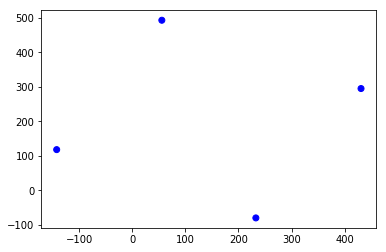

In [83]:
tsne = manifold.TSNE(perplexity=4, metric='cosine')
X_prime = tsne.fit_transform(X)
plt.scatter(X_prime[:, 0], X_prime[:, 1], c=colors)

Reducimos miles de dimensiones de la ultima capa a dos dimensiones con tsne para ver las girafas y barcos. Claramenet 

Hemos hecho un buscador de imagenes usando transfer learning con VGG

RNN-s (LSTM)
https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f

In [91]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

17465344/17464789 [==============================] - 2s 0us/step


Estamos obligados a meter 500 caracteres. Si tenemos menos, rellenamos con espacios (pad). Pytorch no nos restringe

Tenemos un input_dim de 5k en one hot encoding. Es un poco pobre por lo que hacemos una embbeding para sacar 32 dimensions 

In [93]:
inputs = Input(shape=(500,), dtype='int32')
emb = Embedding(input_dim=5000, output_dim=32, input_length=500)(inputs)
l0 = LSTM(units=100)(emb)
preds = Dense(1, activation='sigmoid')(l0)

model = Model(inputs=inputs, outputs=preds)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
